In [20]:
# cargar dataset y realizar EDA

In [21]:
import pandas as pd
import boto3
from sagemaker import get_execution_role

# Cargar datos desde S3
s3 = boto3.client('s3')
bucket_name = 'bucketretofinal'
file_name = 'flights.csv'
s3.download_file(bucket_name, file_name, '/tmp/flights.csv')
df = pd.read_csv('/tmp/flights.csv')

df.head()
df.describe()
df.isnull().sum()
df['FLT_DATE'] = pd.to_datetime(df['FLT_DATE'])
df['DAY_OF_WEEK'] = df['FLT_DATE'].dt.dayofweek
df.head(10)


,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2,Pivot Label,DAY_OF_WEEK
0,2016,1,JAN,2016-01-01 00:00:00+00:00,EBAW,Antwerp,Belgium,4,3,7,NaN,NaN,NaN,Antwerp (EBAW),4
1,2016,1,JAN,2016-01-01 00:00:00+00:00,EBBR,Brussels,Belgium,174,171,345,174.0,161.0,335.0,Brussels (EBBR),4
2,2016,1,JAN,2016-01-01 00:00:00+00:00,EBCI,Charleroi,Belgium,45,47,92,45.0,45.0,90.0,Charleroi (EBCI),4
3,2016,1,JAN,2016-01-01 00:00:00+00:00,EBLG,Liège,Belgium,6,7,13,NaN,NaN,NaN,Liège (EBLG),4
4,2016,1,JAN,2016-01-01 00:00:00+00:00,EBOS,Ostend-Bruges,Belgium,7,7,14,NaN,NaN,NaN,Ostend-Bruges (EBOS),4
5,2016,1,JAN,2016-01-01 00:00:00+00:00,EDDB,Berlin - Brandenburg,Germany,98,99,197,NaN,NaN,NaN,Berlin - Brandenburg (EDDB),4
6,2016,1,JAN,2016-01-01 00:00:00+00:00,EDDC,Dresden,Germany,18,21,39,NaN,NaN,NaN,Dresden (EDDC),4
7,2016,1,JAN,2016-01-01 00:00:00+00:00,EDDE,Erfurt,Germany,1,1,2,NaN,NaN,NaN,Erfurt (EDDE),4
8,2016,1,JAN,2016-01-01 00:00:00+00:00,EDDF,Frankfurt,Germany,401,341,742,401.0,306.0,707.0,Frankfurt (EDDF),4
9,2016,1,JAN,2016-01-01 00:00:00+00:00,EDDG,Muenster-Osnabrueck,Germany,3,4,7,NaN,NaN,NaN,Muenster-Osnabrueck (EDDG),4


In [22]:
# exploracion inicial

Primeras filas del dataset:
   YEAR  MONTH_NUM MONTH_MON                  FLT_DATE APT_ICAO  \
0  2016          1       JAN 2016-01-01 00:00:00+00:00     EBAW   
1  2016          1       JAN 2016-01-01 00:00:00+00:00     EBBR   
2  2016          1       JAN 2016-01-01 00:00:00+00:00     EBCI   
3  2016          1       JAN 2016-01-01 00:00:00+00:00     EBLG   
4  2016          1       JAN 2016-01-01 00:00:00+00:00     EBOS   

        APT_NAME STATE_NAME  FLT_DEP_1  FLT_ARR_1  FLT_TOT_1  FLT_DEP_IFR_2  \
0        Antwerp    Belgium          4          3          7            NaN   
1       Brussels    Belgium        174        171        345          174.0   
2      Charleroi    Belgium         45         47         92           45.0   
3          Liège    Belgium          6          7         13            NaN   
4  Ostend-Bruges    Belgium          7          7         14            NaN   

   FLT_ARR_IFR_2  FLT_TOT_IFR_2           Pivot Label  DAY_OF_WEEK  
0            NaN         

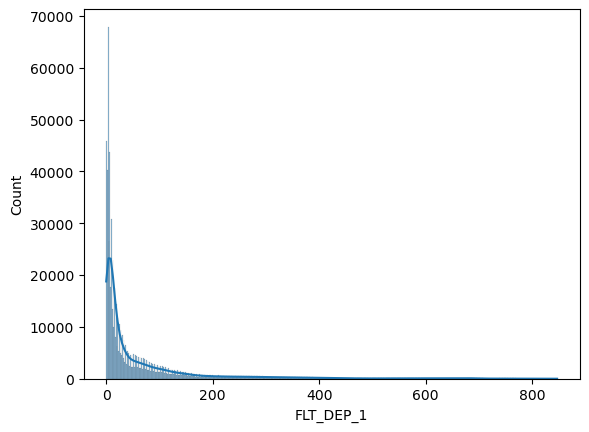


'FLT_ARR_1'column distribution:


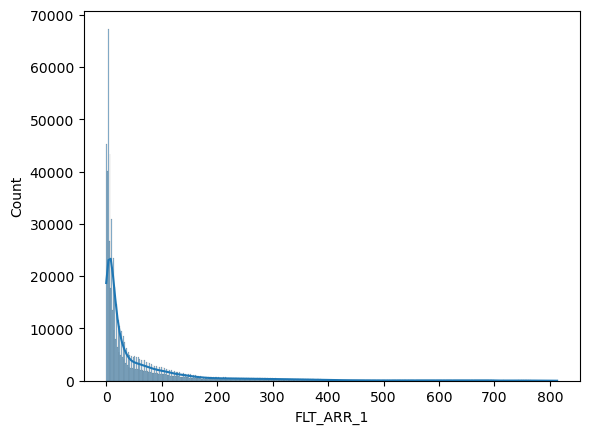


heatmap of INT core values:


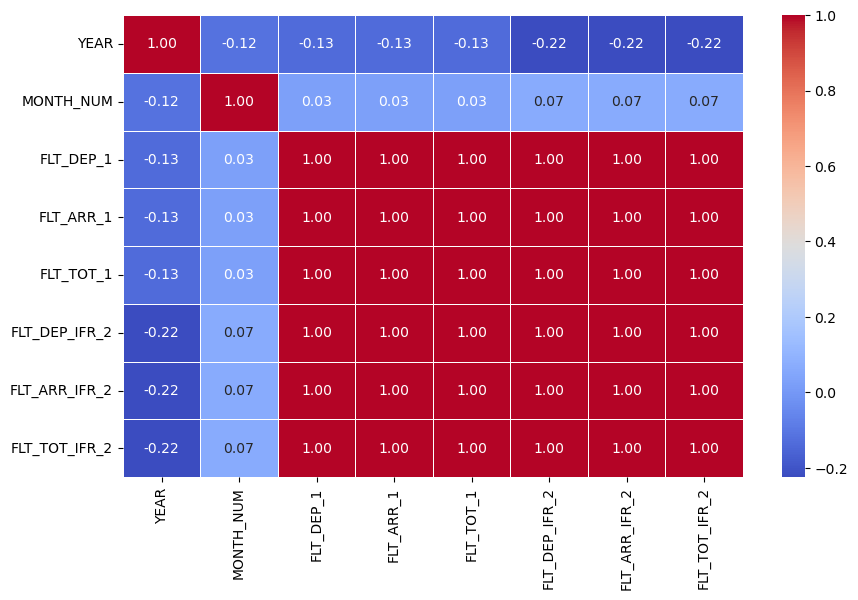

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# first dataset logs
print("Primeras filas del dataset:")
print(df.head())

print("\nColumns and datatypes:")
df.info()

print("\nNull values inside the dataset:")
print(df.isnull().sum())

# descriptive stats
print("\nDescriptive stats:")
print(df.describe())

#  'FLT_DEP_1' graphic (number of departure flights via IFR)
print("\n'FLT_DEP_1' column distribution:")
sns.histplot(df['FLT_DEP_1'], kde=True)
plt.show()

# 'FLT_ARR_1' graphic (number of arrival flights via IFR)
print("\n'FLT_ARR_1'column distribution:")
sns.histplot(df['FLT_ARR_1'], kde=True)
plt.show()

# filter numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
print("\nheatmap of INT core values:")
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


In [24]:
#preparacion de datos

In [25]:
# data cleansing
df_cleaned = df.copy()
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned['FLT_DATE'] = pd.to_datetime(df_cleaned['FLT_DATE'], errors='coerce')

# check file
print("Primeras filas después de la conversión de fecha:")
print(df_cleaned.head())


Primeras filas después de la conversión de fecha:
   YEAR  MONTH_NUM MONTH_MON                  FLT_DATE APT_ICAO  \
0  2016          1       JAN 2016-01-01 00:00:00+00:00     EBAW   
1  2016          1       JAN 2016-01-01 00:00:00+00:00     EBBR   
2  2016          1       JAN 2016-01-01 00:00:00+00:00     EBCI   
3  2016          1       JAN 2016-01-01 00:00:00+00:00     EBLG   
4  2016          1       JAN 2016-01-01 00:00:00+00:00     EBOS   

        APT_NAME STATE_NAME  FLT_DEP_1  FLT_ARR_1  FLT_TOT_1  FLT_DEP_IFR_2  \
0        Antwerp    Belgium          4          3          7            NaN   
1       Brussels    Belgium        174        171        345          174.0   
2      Charleroi    Belgium         45         47         92           45.0   
3          Liège    Belgium          6          7         13            NaN   
4  Ostend-Bruges    Belgium          7          7         14            NaN   

   FLT_ARR_IFR_2  FLT_TOT_IFR_2           Pivot Label  DAY_OF_WEEK  
0  

In [26]:
#segundo EDA limpieza a fondo

column distribution 'FLT_TOT_1' (total movement):


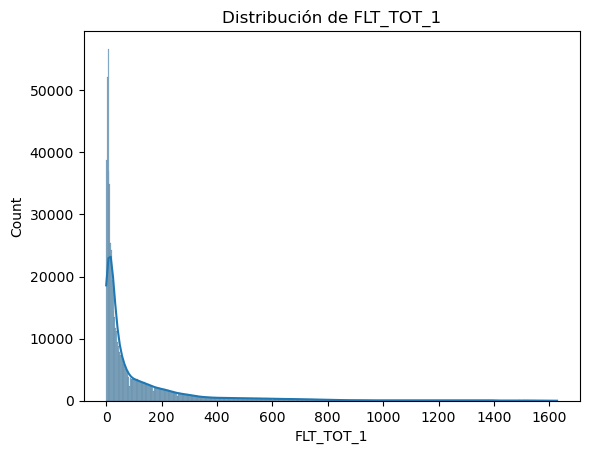


Valores nulos en el dataset:
YEAR                  0
MONTH_NUM             0
MONTH_MON             0
FLT_DATE              0
APT_ICAO              0
APT_NAME              0
STATE_NAME            0
FLT_DEP_1             0
FLT_ARR_1             0
FLT_TOT_1             0
FLT_DEP_IFR_2    479785
FLT_ARR_IFR_2    479785
FLT_TOT_IFR_2    479785
Pivot Label           0
DAY_OF_WEEK           0
dtype: int64


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

print("column distribution 'FLT_TOT_1' (total movement):")
sns.histplot(df_cleaned['FLT_TOT_1'], kde=True)
plt.title("Distribución de FLT_TOT_1")
plt.show()

# null values verif
print("\nValores nulos en el dataset:")
print(df_cleaned.isnull().sum())


In [28]:
# transformations, null data solutions

In [29]:
# usar mediana
df_cleaned['FLT_DEP_IFR_2'] = df_cleaned['FLT_DEP_IFR_2'].fillna(df_cleaned['FLT_DEP_IFR_2'].median())
df_cleaned['FLT_ARR_IFR_2'] = df_cleaned['FLT_ARR_IFR_2'].fillna(df_cleaned['FLT_ARR_IFR_2'].median())
df_cleaned['FLT_TOT_IFR_2'] = df_cleaned['FLT_TOT_IFR_2'].fillna(df_cleaned['FLT_TOT_IFR_2'].median())



In [30]:
# predictive AI modeling (regresion lineal/random forest)

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select independent variable (X) and target variable (y)
X = df_cleaned[['YEAR', 'MONTH_NUM', 'FLT_DEP_1', 'FLT_ARR_1', 'FLT_TOT_1', 'DAY_OF_WEEK']]  #IV
y = df_cleaned['FLT_TOT_IFR_2']  # Variable objetivo

# set train and test data percentages
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Regresión Lineal ---

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# model evaluation
print(f"\n--- Regresión Lineal ---")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}")

# --- Random Forest ---
rf_model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# model evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\n--- Random Forest ---")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")



--- Regresión Lineal ---
Mean Squared Error: 7688.847497699356
R-squared: 0.753487342144786

--- Random Forest ---
Mean Squared Error: 4512.170191725754
R-squared: 0.8553350073609589


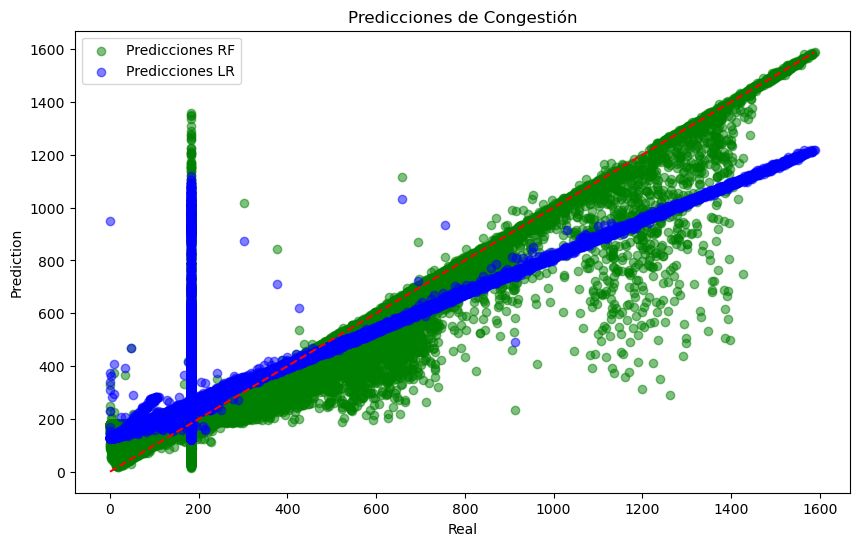

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5, label='Predicciones RF')
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5, label='Predicciones LR')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # ideal line for prediction purposes
plt.xlabel('Real')
plt.ylabel('Prediction')
plt.title('Predicciones de Congestión')
plt.legend()
plt.show()

